# Музыка в Москве и Санкт-Петербурге

## Обзор данных

Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
!pip3 install jupyterthemes
!jt -t gruvboxd -T -N -kl -nfs 12 -ofs 10 -dfs 10 -tfs 14

Функция для обзора и отображания информации о данных

In [2]:
def table_info (data):
    display(data.sample(10)) #10 случайных строк
    print('---------------')
    data.info() #инфо по столбцам
    print('---------------')
    print('Дубликатов:', data.duplicated().sum()) #кол-во дубликатов
    print('---------------')
    print('Пропущенных значений', df.isna().sum()) #кол-во пропущенных значений

Функция для замены значений в столбце.
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

In [3]:
def replace_wrong_genres(wrong_genres, correct_genre): 
    for wrong_genre in wrong_genres: 
        df['genre'] = df['genre'].replace(wrong_genre, correct_genre)

Функция для подсчета прослушиваний для заданного дня и города. `day` - день недели, `city` - город.

In [4]:
def number_tracks(day,city):  
    track_list = df[(df['day'] == day) & (df['city'] == city)]  
    track_list_count = track_list['user_id'].count()
    return track_list_count

Функция возвращает информацию о топ-10 жанров тех треков, которые прослушивали в указанный день, в промежутке между двумя отметками времени.

* `table` - таблица (датафрейм) с данными,
* `day` - день недели,
* `time1` - начальная временная метка в формате 'hh:mm',
* `time2` - последняя временная метка в формате 'hh:mm'.


In [5]:
def genre_weekday(table,day,time1,time2):
    genre_df = table[(table['day'] == day) & (table['time']>= time1) & (table['time'] <= time2)]
    genre_df_count = genre_df.groupby('genre')['user_id'].count() 
    genre_df_sorted = genre_df_count.sort_values(ascending=False).head(10)
    return genre_df_sorted

Читаем файл и сохраняем его в переменной `df`:

In [6]:
df = pd.read_csv('yandex_music_project.csv')

Выводим основную информацию о таблице:

In [7]:
table_info(df)

,userID,Track,artist,genre,City,time,Day
50510,6F41EDC3,Response,Rido,electronic,Moscow,08:32:07,Friday
57111,48EC9DAA,Temneh Oh Sentireh,Treha Sektori,experimental,Saint-Petersburg,13:23:28,Monday
63064,55AE688E,Rock Tha Party,Bombay Rockers,pop,Moscow,21:18:32,Friday
47829,8347DFD,Lights Out,Mixe1,rock,Moscow,13:39:41,Monday
41223,1622FABC,Distant Shores,Visions of Atlantis,epicmetal,Moscow,13:11:55,Wednesday
1862,BE14CC56,Bad Days,Timo Maas,pop,Moscow,13:13:32,Monday
60318,4DA710E1,You've Got Some,The Madison,dance,Moscow,09:38:20,Wednesday
46102,5B96C712,Bad Man's World,Jenny Lewis,folk,Moscow,13:49:05,Monday
8245,228500A8,Profit,Drop8,metal,Moscow,09:18:32,Monday
42576,8B8E7E0B,"Far from Any Road (From ""True Detective"")",Lakeside Revival,folk,Moscow,13:15:46,Friday


---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB
---------------
Дубликатов: 3826
---------------
Пропущенных значений   userID       0
Track       1231
artist      7203
genre       1198
  City         0
time           0
Day            0
dtype: int64


### Выводы
В таблице семь столбцов. Тип данных во всех столбцах — `object`. Названия столбцов стоит привести к единому стилю. Пропуски в столбцах `Track`, `artist`, `genre` заменим на `unknown` и проверим как это повлияет на исследование. В таблице 3826 явных дубликатов.

## Предобработка данных

### Названия столбцов

Посмотрим на названия столбцов повнимательнее:

In [8]:
print(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


Переименуем столбцы и приведем их к одному стилю.

In [9]:
df = df.rename(columns={'  userID': 'user_id', 'Track': 'track', '  City  ' : 'city', 'Day': 'day'})

Проверим результат.

In [10]:
print(df.columns)

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


### Пропущенные значения

Подсчитаем пропуски ещё раз.

In [11]:
print(df.isna().sum())

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64


Заменим пропущенные значкения на `unknown`.

In [12]:
columns_to_replace = ['track', 'artist', 'genre']
for element in columns_to_replace: 
    df[element] = df[element].fillna('unknown')

Проверим.

In [13]:
print(df.isna().sum())

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64


### Дубликаты

Удаляем явные дубликаты.

In [14]:
df = df.drop_duplicates().reset_index(drop=True) 

Проверяем.

In [15]:
print(df.duplicated().sum()) 

0


Проверим неявные дубликаты в колонке `genre`.

In [16]:
genre = df ['genre'] 
print(sorted(genre.unique()))

['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans', 'alternative', 'alternativepunk', 'ambient', 'americana', 'animated', 'anime', 'arabesk', 'arabic', 'arena', 'argentinetango', 'art', 'audiobook', 'author', 'avantgarde', 'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass', 'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks', 'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean', 'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill', 'chinese', 'choral', 'christian', 'christmas', 'classical', 'classicmetal', 'club', 'colombian', 'comedy', 'conjazz', 'contemporary', 'country', 'cuban', 'dance', 'dancehall', 'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr', 'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo', 'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic', 'electropop', 'emo', 'entehno', 'epicmetal', 'estrada', 'ethnic', 'eurofolk', 'european', 'experimental', 'extrememetal', 'fado', 'fairyt

Есть неявные дубликаты названия `hiphop`:
* hip,
* hop,
* hip-hop.
Заменим при помощи функции replace_wrong_genres.

In [17]:
duplicates = ['hip', 'hop', 'hip-hop']
genre = 'hiphop'
replace_wrong_genres(duplicates,genre)

## Исследование пользовательской активности

Посмотрим сколько треков прослушали пользователи в каждом городе.

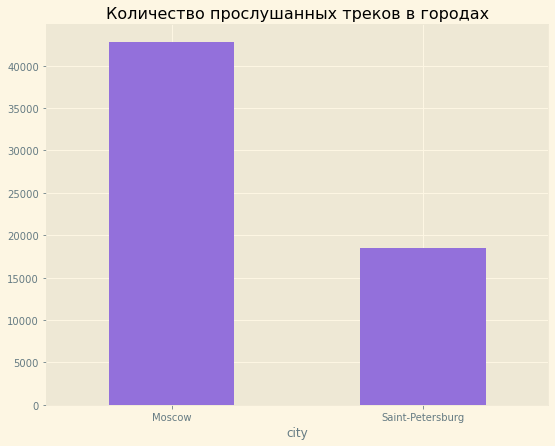

In [18]:
df.groupby('city')['track'].count().plot(kind='bar',figsize=(9, 7), grid=True, color='mediumpurple')
plt.xticks(rotation=0)
plt.title('Количество прослушанных треков в городах'); 

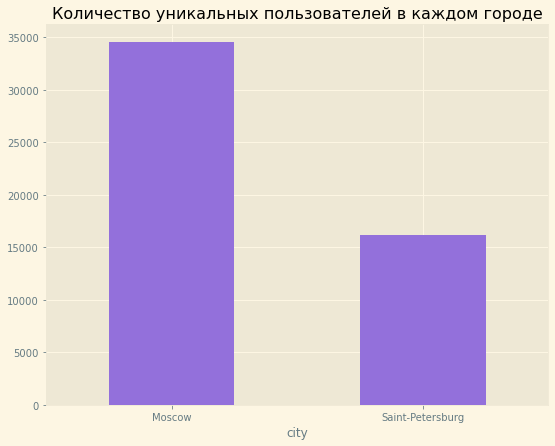

In [19]:
df.groupby('city')['track'].nunique().plot(kind='bar',figsize=(9, 7), grid=True, color='mediumpurple')
plt.xticks(rotation=0)
plt.title('Количество уникальных пользователей в каждом городе');

В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

Сгруппируем данные по дню недели и подсчитаем прослушивания в понедельник, среду и пятницу.

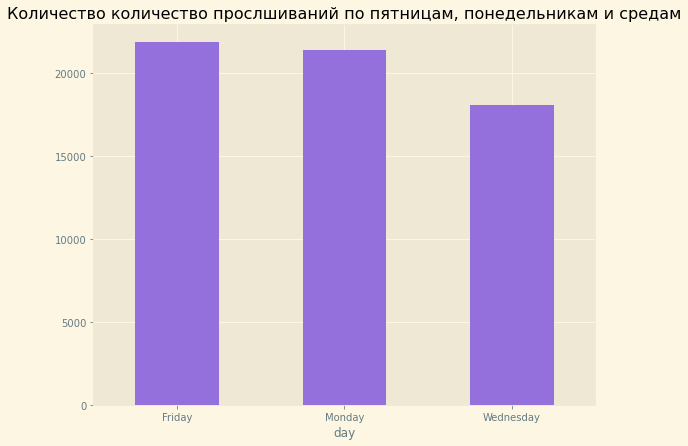

In [20]:
df.groupby('day')['user_id'].count().plot(kind='bar',figsize=(9, 7), grid=True, color='mediumpurple')
plt.xticks(rotation=0)
plt.title('Количество количество прослшиваний по пятницам, понедельникам и средам');

В среднем пользователи из двух городов менее активны по средам. Посмотрим на активность пользователей разных городов в каждый из трех дней.

Количество прослушиваний в Москве по понедельникам

In [21]:
number_tracks('Monday','Moscow')

15740

Количество прослушиваний в Санкт-Петербурге по понедельникам

In [22]:
number_tracks('Monday','Saint-Petersburg')

5614

Количество прослушиваний в Москве по средам

In [23]:
number_tracks('Wednesday','Moscow')

11056

Количество прослушиваний в Санкт-Петербурге по средам

In [24]:
number_tracks('Wednesday','Saint-Petersburg')

7003

Количество прослушиваний в Москве по пятницам

In [25]:
number_tracks('Friday','Moscow')

15945

Количество прослушиваний в Санкт-Петербурге по пятницам

In [26]:
number_tracks('Friday','Saint-Petersburg')

5895

Создадим таблицу с результатами.

In [27]:
columns = ['city', 'monday', 'wednesday', 'friday']
data = [['Moscow',15740, 11056, 15945],
        ['Saint-Petersburg', 5614, 7003, 5895]]

pd.DataFrame(data=data, columns=columns)

,city,monday,wednesday,friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Очевидно, что активность пользователей зависит от дня недели.

### Музыка в начале и в конце недели

Изучим популярность жанров в городах по утрам понедельника и вечерам пятницы.

Сохраним таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [28]:
moscow_general = df[df['city'] == 'Moscow']
display(moscow_general.sample(5))

,user_id,track,artist,genre,city,time,day
37598,577247D,Настроение на 5+,Сердце,ruspop,Moscow,13:15:56,Monday
26993,C3D69BFE,Good Times,Love,rock,Moscow,13:53:22,Friday
19069,A9143178,Whiskey Bourbon Rye,I Am the Liquor,metal,Moscow,09:07:02,Friday
10317,7CC0DF8E,Take This Christmas,Chuck Eaton,pop,Moscow,08:42:44,Friday
17760,5DE01096,Mystic Music Garden,J Sasz,electronic,Moscow,13:55:13,Friday


In [29]:
spb_general = df[df['city'] == 'Saint-Petersburg']
display(spb_general.sample(5))

,user_id,track,artist,genre,city,time,day
34894,37D2739C,Idoru Lap Dancer,Undo,downtempo,Saint-Petersburg,13:24:21,Monday
25356,4D8D8E4D,Professional Tracker,Hoffman,electronic,Saint-Petersburg,20:27:47,Friday
32696,BEED58DD,Higher Realm,unknown,inspirational,Saint-Petersburg,08:09:44,Wednesday
22107,D30F5C75,Гремят над Москвою салюты,Владимир Трошин,retro,Saint-Petersburg,13:31:57,Friday
56528,451FDB11,Fallen Angels,Cold Snap,numetal,Saint-Petersburg,21:20:27,Wednesday


Результаты для Москвы в понедельник утром (с 7:00 до 11:00):

In [30]:
genre_weekday(moscow_general,'Monday', '07:00', '11:00')

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: user_id, dtype: int64

Результаты для Санкт-Петербурга в понедельник утром (с 7:00 до 11:00):

In [31]:
genre_weekday(spb_general,'Monday', '07:00:00', '11:00:00')

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: user_id, dtype: int64

Результаты для Москвы в пятницу вечером (с 17:00 до 23:00):

In [32]:
genre_weekday(moscow_general,'Friday', '17:00:00', '23:00:00')

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: user_id, dtype: int64

Результаты для Санкт-Петербурга в пятницу вечером (с 17:00 до 23:00):

In [33]:
genre_weekday(spb_general,'Friday', '17:00:00', '23:00:00') 

genre
pop            256
electronic     216
rock           216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: user_id, dtype: int64

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, пользователи слушают похожую музыку в начале недели и в конце.Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Популярные жанры в Москве.

In [34]:
moscow_genres = moscow_general.groupby('genre')['user_id'].count()
moscow_genres = moscow_genres.sort_values(ascending=False)
display(moscow_genres.head(10))

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: user_id, dtype: int64

Популярные жанры в Санкт-Петербурге.

In [35]:
spb_genres = spb_general.groupby('genre')['user_id'].count()
spb_genres = spb_genres.sort_values(ascending=False)
display(spb_genres.head(10))

genre
pop            2431
dance          1932
rock           1879
electronic     1736
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: user_id, dtype: int64

**Выводы**

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 


## Итоги исследования

День недели по-разному влияет на активность пользователей в Москве и Петербурге. В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Пользователи слушают похожую музыку в начале недели и в конце.Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Поп-музыка — самый популярный жанр в Москве. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге.